# Quantum Computing: Grover's Algorithm

In this notebook, I have tried explain implementing Grover's Search Algorithm using Qiskit. It is quantum algorithm deviced in 1996. It searches unsorted database. It searches from N number of element in root(N) evaluations using Oracle. Oracle is a black box where you can pass queries to it and get the answers from it.

You have likely heard that one of the many advantages a quantum computer has over a classical computer is its superior speed searching databases. Grover's algorithm demonstrates this capability. This algorithm can speed up an unstructured search problem quadratically, but its uses extend beyond that; it can serve as a general trick or subroutine to obtain quadratic run time improvements for a variety of other algorithms. This is called the amplitude amplification trick.

[Source: https://qiskit.org/textbook/ch-algorithms/grover.html]

Grover's serch algorithm solves the problem of an untructured search. When there is N number of possible input values, the classical algorithm requries O(N) evaluations while the Grover's algorithm requires roughly O($\sqrt{N}$) evaluations. The algorithm can be considered generic as it does not use list's internal structure which gives a quadratic speed. The algorithm consists of the following steps:

1. Initialization of the qubits in the ∣0⟩ state 
1. Uniform Superposition of all basis inputs
1. Execution of the Oracle
1. Application of Grover's diffusion operator (inversion about the mean)
1. Repetitions of step 3 and 4
1. Measurement

[Source: https://www.eweek.com/enterprise-apps/organizations-need-to-be-prepared-for-quantum-computing-threats]


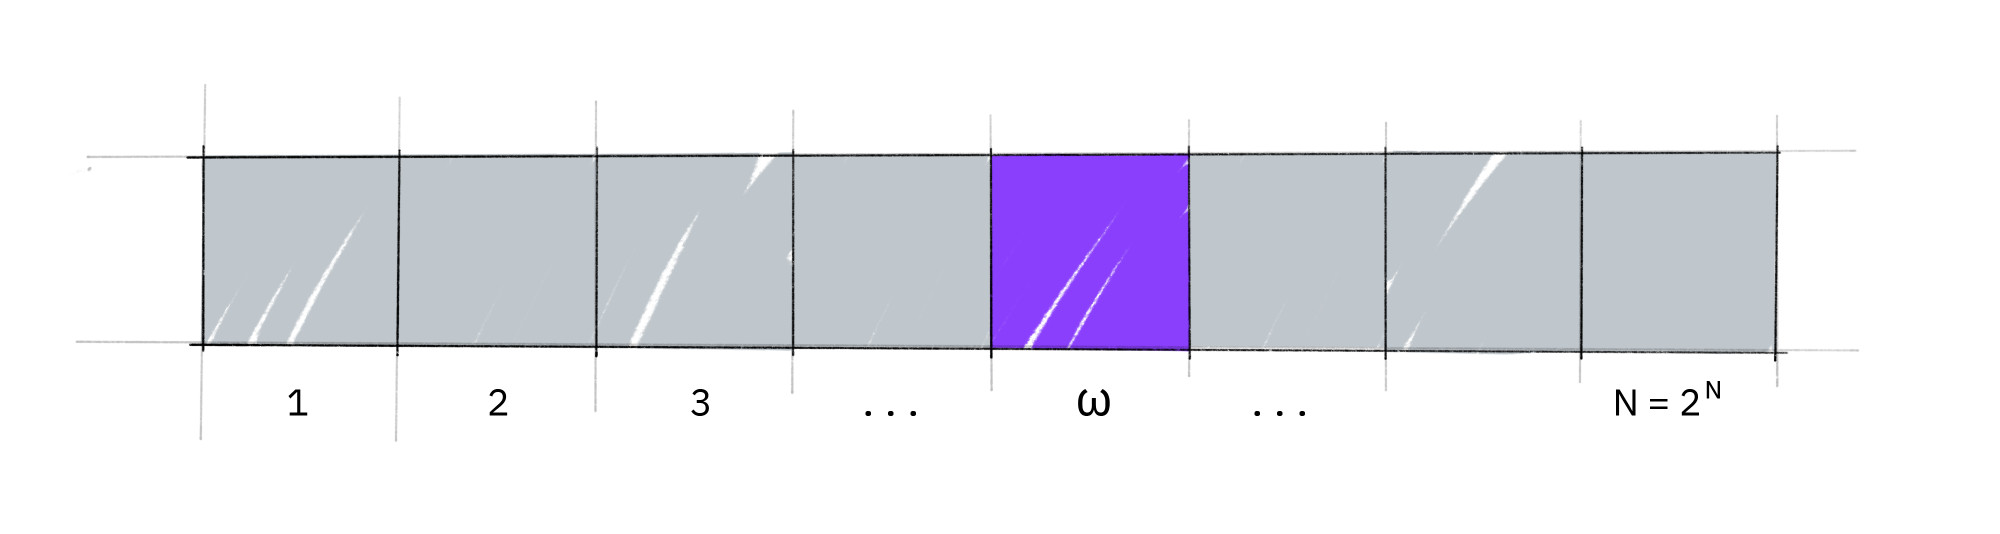

In [1]:
from IPython.display import Image
print("[Source: https://www.eweek.com/enterprise-apps/organizations-need-to-be-prepared-for-quantum-computing-threats]")
Image("../input/quantumimage/grover_list.jpg")

In [2]:
# installing necessary pakages

!pip install qiskit # Quantum Qiskit Library
!pip install pylatexenc # Quantum circuit visualization library. More info: https://github.com/phfaist/pylatexenc

     |████████████████████████████████| 8.5 MB 4.3 MB/s 
     |████████████████████████████████| 17.6 MB 31.4 MB/s 
     |████████████████████████████████| 195 kB 39.0 MB/s 
     |████████████████████████████████| 203 kB 68.2 MB/s 
     |████████████████████████████████| 2.1 MB 24.1 MB/s 
     |████████████████████████████████| 1.0 MB 20.5 MB/s 
     |████████████████████████████████| 79 kB 6.0 MB/s 
     |████████████████████████████████| 582 kB 39.4 MB/s 
     |████████████████████████████████| 133 kB 61.2 MB/s 
     |████████████████████████████████| 5.5 MB 34.2 MB/s 
  Created wheel for qiskit: filename=qiskit-0.23.6-py3-none-any.whl size=2880 sha256=6a9f7cbc4395bd83e3fe5ee06c8a058100584b756d1bce6f491ec54464615fac
  Stored in directory: /root/.cache/pip/wheels/bb/1a/e3/7fe68bdbd6054bba5e6087180f93899759444bbc59da779733
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24080 sha256=4e965b9b8c2516a11d3c5baba987ae4454d6ec90ef943239f9e398

In [3]:
# declaring list which we will use as database for search. There are 13 elements.

my_list=[1,2,3,5,9,11,15,18,44,66,34,7,98]
# my_list=[1,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,,2,3,5,9,11,15,18,44,66,34,98,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,34,2,3,5,9,11,15,18,44,66,7,34]
# We will search 7 in the example belo

In [4]:
# function to search
def the_oracle(my_input):
    winner=7
    if my_input is winner:
        response = True
    else:
        response = False
    return response

In [5]:
for index, trial_number in enumerate(my_list):
    if the_oracle(trial_number) is True:
        print('Winner found at index %i' %index)
        print('%i calls to the oracle used' %(index+1))
        break

Winner found at index 11
12 calls to the oracle used


In [6]:
# importing libraries

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

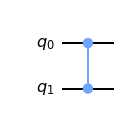

In [7]:
# define the oracle circuit

oracle = QuantumCircuit(2,name='oracle')
oracle.cz(0,1)
oracle.to_gate()
oracle.draw(output='mpl')


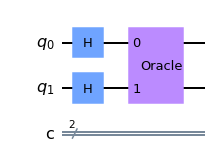

In [8]:
# creating Grover's circiut

# creating backend
backend = Aer.get_backend('statevector_simulator')

# creating Grover's circuit with 2 quantum and 2 classical bit
grover_circ = QuantumCircuit(2,2)

# applying Hadamard gate on both the quit of Grover's circuit
grover_circ.h([0,1])

# appending circuit
grover_circ.append(oracle,[0,1])

# drawing the Grover's circuit
grover_circ.draw(output='mpl')

In [9]:
# creating job for Grover's circuit

job = execute(grover_circ,backend)
result = job.result()
print(result)

Result(backend_name='statevector_simulator', backend_version='0.7.5', qobj_id='24b862da-0d6f-4065-92f3-08ab63633406', job_id='114f2bdb-271a-4cc3-acd5-42e4ebc12e20', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(counts={'0x0': 1}, statevector=[ 0.5+0.j  0.5+0.j  0.5+0.j -0.5+0.j]), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit10', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=2486765776, time_taken=0.000172079, metadata={'parallel_shots': 1, 'parallel_state_update': 4})], date=2021-03-04T10:31:34.519928, status=COMPLETED, status=QobjHeader(backend_name='statevector_simulator', backend_version='0.7.5'), metadata={'max_memory_mb': 9004, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.000288461}, time_taken=0.00047898292541503906)


In [10]:
# getting state vector and rouding all the element of the array

sv = result.get_statevector()
np.around(sv,2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

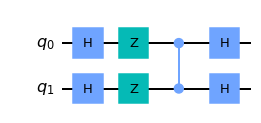

In [11]:
# creating reflection circuit

reflection = QuantumCircuit(2,name='reflection')
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()
reflection.draw(output='mpl')

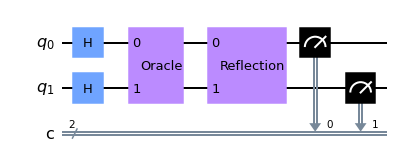

In [12]:
# appending Reflection circuit to Grover's circuit

grover_circ.append(reflection,[0,1])
grover_circ.measure([0,1],[0,1])
grover_circ.draw(output='mpl')

# Executing circuit on statevector_simulator

{'11': 1}


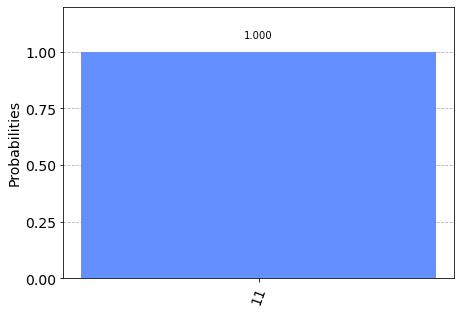

In [13]:
# executing the Grover's circuit for the search on statevector_simulator

job=execute(grover_circ,backend,shots=1)
result=job.result()
counts=result.get_counts()

print(counts)

# shwoing counts on graphs
plot_histogram(counts)

# Executing Circuit on actual IBM Computer

In [14]:
# we will run this circuit on actual quantum computer available at IBM

# Connecting to the real quantum computers
from qiskit import IBMQ

# provider = IBMQ.load_account() # We load our account 

IBMQ.save_account('d86d309ce2f1cee1177b9ae1455a4445ec6c02578154623d71c75db323329ffbb7226ab6b6fc24e0aee77b8f5119e2c622d3e8591fcb98cff17ad52dadda472b',overwrite=True)  #save your creds
IBMQ.load_account()

provider = IBMQ.get_provider() # We load our account 
provider.backends() # We retrieve the backends to check their status

for b in provider.backends():
    print(b.status().to_dict())

__init__.discover_credentials:INFO:2021-03-04 10:31:36,039: Using credentials from qiskitrc
/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


{'backend_name': 'ibmq_qasm_simulator', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 36, 'status_msg': 'active'}
{'backend_name': 'ibmqx2', 'backend_version': '2.3.0', 'operational': True, 'pending_jobs': 1264, 'status_msg': 'active'}
{'backend_name': 'ibmq_16_melbourne', 'backend_version': '2.3.12', 'operational': True, 'pending_jobs': 5762, 'status_msg': 'active'}
{'backend_name': 'ibmq_armonk', 'backend_version': '2.4.1', 'operational': True, 'pending_jobs': 124, 'status_msg': 'active'}
{'backend_name': 'ibmq_athens', 'backend_version': '1.3.11', 'operational': True, 'pending_jobs': 5212, 'status_msg': 'active'}
{'backend_name': 'ibmq_santiago', 'backend_version': '1.3.12', 'operational': True, 'pending_jobs': 5561, 'status_msg': 'active'}
{'backend_name': 'ibmq_lima', 'backend_version': '1.0.3', 'operational': True, 'pending_jobs': 94, 'status_msg': 'active'}
{'backend_name': 'ibmq_belem', 'backend_version': '1.0.1', 'operational': True, 'pending_jobs': 35, 's

## Executing circuit on ibmq_qasm_simulator

We only used {'11': 1} call to the Oracle to find our result. Here '11' is the state and '1' is the count.


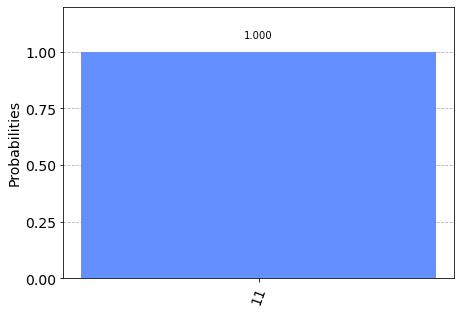

In [15]:
# Executing on the IBMQ Experience simulator: ibmq_qasm_simulator

# seleting backend
backend_qasm = provider.get_backend('ibmq_qasm_simulator')

# executing the Grover's circuit for the search; we will run circuit for Once and we will get result in 11 state
job=execute(grover_circ,backend_qasm,shots=1)
result=job.result()
counts=result.get_counts()

print("We only used %s call to the Oracle to find our result. Here '11' is the state and '1' is the count." % (counts))

# shwoing counts on graphs
plot_histogram(counts)

## Executing circuit on actual Quantum machine at ibmq_quito

We only used {'11': 1} call to the Oracle to find our result. Here '11' is the state and '1' is the count.


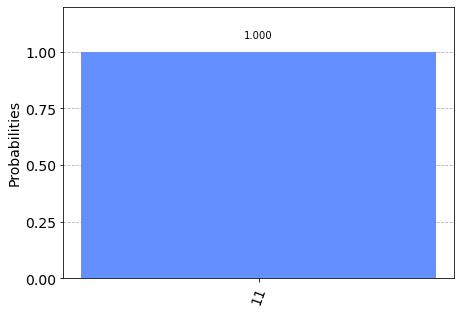

In [16]:
# Executing on actual Quantum machine at: ibmq_santiago

# selecting backend. We have selected IBMQ machine: ibmq_quito
backend_Santiago = provider.get_backend('ibmq_quito') # selecting ibmq_quito machine as backend

# executing the Grover's circuit for the search; we will run circuit for Once and we will get result in 11 state
job=execute(grover_circ,backend_Santiago,shots=1)
result=job.result()
counts=result.get_counts()

print("We only used %s call to the Oracle to find our result. Here '11' is the state and '1' is the count." % (counts))

# shwoing counts on graphs
plot_histogram(counts)

**References:**
1. https://qiskit.org/textbook/ch-algorithms/grover.html
1. https://www.quantum-inspire.com/kbase/grover-algorithm/
1. https://www.youtube.com/watch?v=EoH3JeqA55A
1. https://www.youtube.com/watch?v=0RPFWZj7Jm0
1. https://www.youtube.com/watch?v=hK6BBluTGhU

In [17]:
print("Notebook completed!")

Notebook completed!
